In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
data = np.load('nate_sims/new_nate_lightcone.npz', allow_pickle = True)

In [9]:
np.transpose(data['peak'])[9]

array([6728.5, 6814.5, 6853.5, ..., 6499.5, 6499.5, 6499.5], dtype=float32)

In [10]:
data['zL']

array([6728.5, 6814.5, 6853.5, ..., 6499.5, 6499.5, 6499.5], dtype=float32)

## Redshift Interpolator

In [20]:
from astropy.cosmology import WMAP9 as cosmo
import scipy as sp
from scipy import interpolate

In [17]:
cosmo.comoving_distance(np.array([0.5, 1.0, 1.5])).unit

Unit("Mpc")

In [14]:
z_mesh = np.linspace(0, 6, 600)

In [15]:
comov_mesh = cosmo.comoving_distance(z_mesh).value

Text(0.5, 0, 'Comoving Distance [Mpc]')

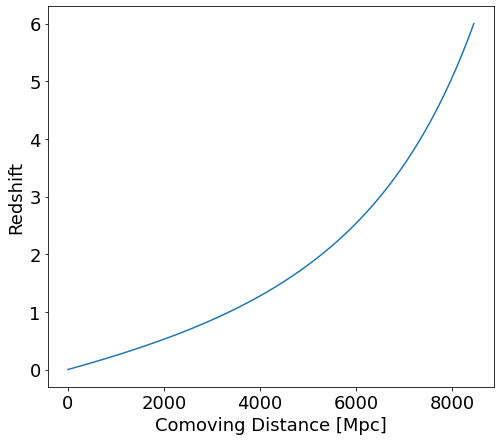

In [31]:
plt.plot(comov_mesh, z_mesh)
plt.ylabel('Redshift')
plt.xlabel('Comoving Distance [Mpc]')

In [25]:
f = interpolate.interp1d(comov_mesh, z_mesh)
comov_arr = np.linspace(0, 8000, 25)

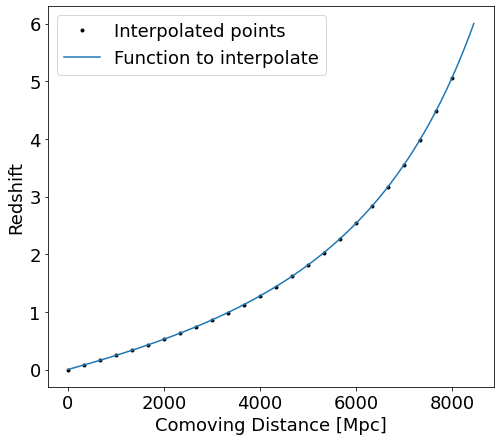

In [30]:
plt.plot(comov_arr, f(comov_arr), '.k', label = 'Interpolated points')
plt.plot(comov_mesh, z_mesh, label = 'Function to interpolate')
plt.ylabel('Redshift')
plt.xlabel('Comoving Distance [Mpc]')
plt.legend()

## Running Nate Sims through `limlam_mocker`

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

In [2]:
# Initialize LineModel with default model
m = lim()
m_co = lim('TonyLi_PhI', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
map_zs = (m_co.mapinst.nu_rest/m_co.mapinst.nu_bincents) - 1

Gaussian

In [4]:
gauss_map = m_co.maps

Loading .npz catalogues...


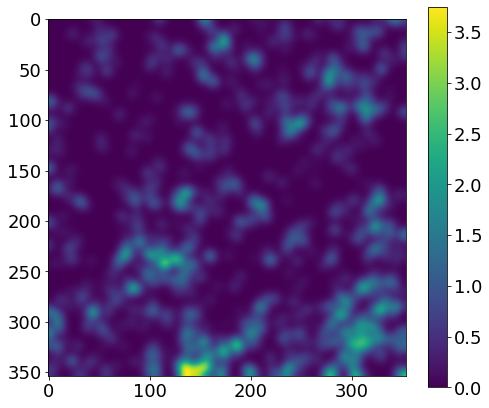

In [5]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5))
plt.colorbar()

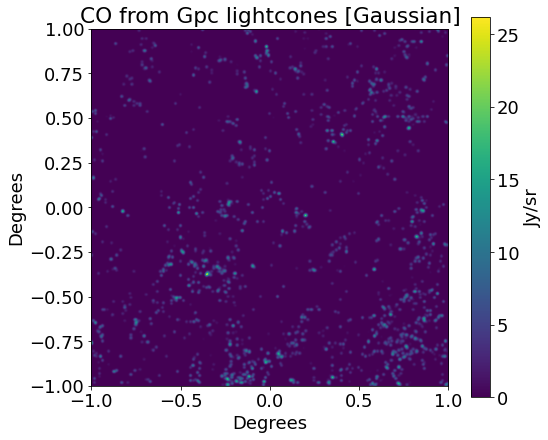

In [11]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 1), extent = [-1, 1, -1, 1])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO from Gpc lightcones [Gaussian]')
plt.colorbar(label = 'Jy/sr')
plt.savefig('gaussian_4deg.pdf', bbox_inches = 'tight')

Non-Gaussian; instability

In [4]:
ngauss_instab_map = m_co.maps

Loading .npz catalogues...


Loading .npz catalogues...


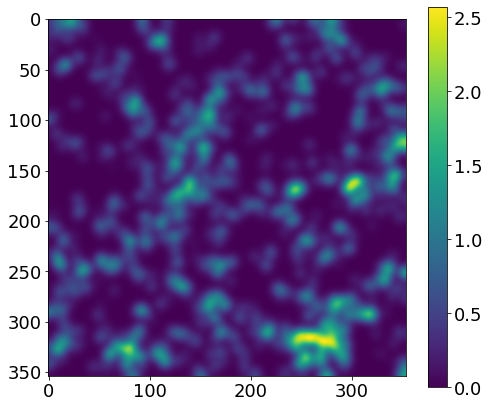

In [4]:
plt.imshow(gaussian_filter(m_co.maps[:, :, 5], 5))
plt.colorbar()

Non-Gaussian; Power Spectrum

In [4]:
ngauss_pspec_map = m_co.maps

Loading .npz catalogues...


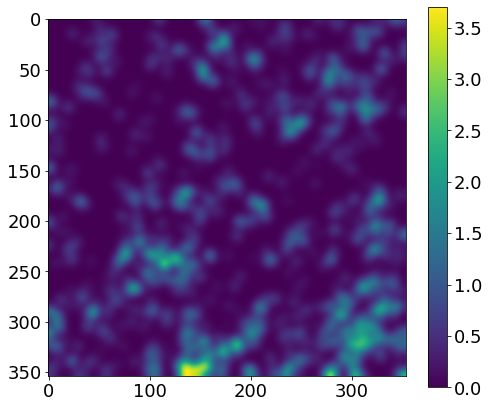

In [14]:
plt.imshow(gaussian_filter(ngauss_pspec_map[:, :, 5], 5))
plt.colorbar()

### With Adapted $\Omega_{field}$

$tan(\theta) = x/d$, where $\theta$ = angular size of object on the sky, $x$ = size of the object and $d$ = its distance

$x$ = 1 GPc, $d$ = 6.5 Gpc, so $\theta$ ~ 0.15 rad ~ 9 deg

so $\Omega_{field}$ ~ 81 deg²

- Gaussian Case

In [4]:
gauss_map = m_co.maps

Loading .npz catalogues...


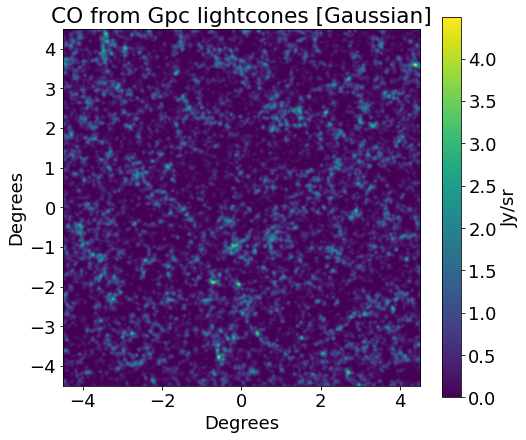

In [5]:
plt.imshow(gaussian_filter(gauss_map[:, :, 5], 5), extent = [-4.5, 4.5, -4.5, 4.5])
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO from Gpc lightcones [Gaussian]')
plt.colorbar(label = 'Jy/sr')
plt.savefig('gaussian_81deg.pdf', bbox_inches = 'tight')

- Non-Gaussian; Instability

In [4]:
ngauss_instab_map = m_co.maps

Loading .npz catalogues...


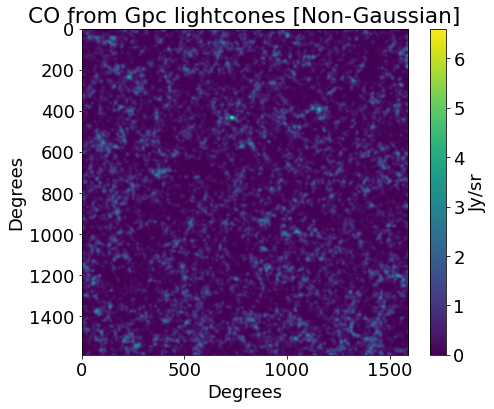

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 6))

plt.subplot(111)
plt.imshow(gaussian_filter(ngauss_instab_map[:, :, 5], 5))
plt.xlabel('Degrees')
plt.ylabel('Degrees')
plt.title('CO from Gpc lightcones [Non-Gaussian]')
plt.colorbar(label = 'Jy/sr')
plt.savefig('ngaussian_81deg.pdf', bbox_inches = 'tight')

- Non-Gaussian; Power Spectrum

In [4]:
ngauss_pspec_map = m_co.maps

Loading .npz catalogues...


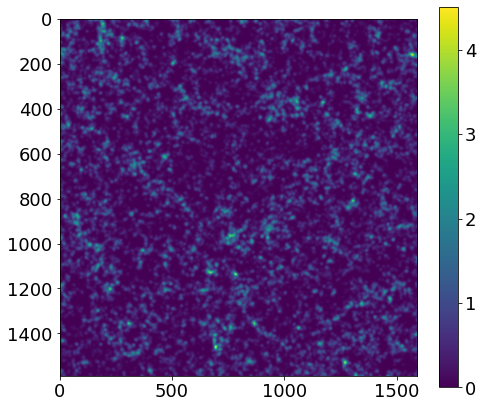

In [5]:
plt.imshow(gaussian_filter(ngauss_pspec_map[:, :, 5], 5))
plt.colorbar()